# k-Nearest Neighbors for Classification

In [1]:
import numpy as np
from sklearn import datasets

digits = datasets.load_digits()
list(digits.keys())

['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR']

In [2]:
print(digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


In [3]:
digits["data"]

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
X = digits["data"]
y = digits["target"]
print(X.shape, y.shape)

(1797, 64) (1797,)


# Impact of k

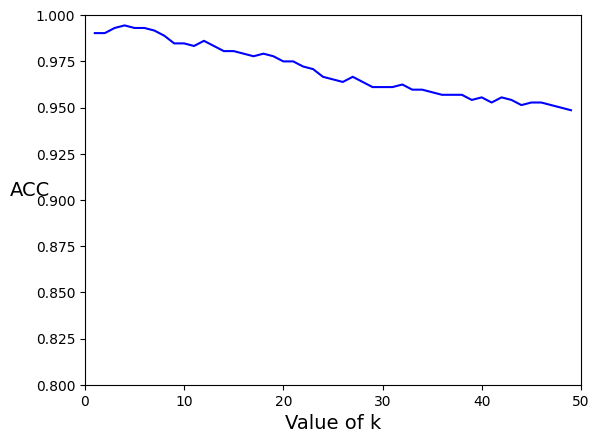

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

acc = []
k_value = []
for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=k) # change number of neighbors k to 10, 100, 200, 500
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    k_value.append(k)
    acc.append(accuracy_score(y_test, y_pred))

indices = np.arange(1, 50)
plt.plot(indices, acc, "b-")
plt.xlabel("Value of k", fontsize=14)
plt.ylabel("ACC", fontsize=14, rotation=0)
plt.axis([0, 50, 0.8, 1])
plt.show()

In [19]:
#Best of k: 5

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))


Accuracy: 0.99

Micro Precision: 0.99
Micro Recall: 0.99
Micro F1-score: 0.99

Macro Precision: 0.99
Macro Recall: 0.99
Macro F1-score: 0.99



# Impact of Searching Algorithm

In [23]:
import time

time1 = time.time()
knn = KNeighborsClassifier(n_neighbors=5, algorithm='brute') #brute, kd_tree,ball_tree
knn.fit(X_train, y_train)
time2 = time.time()
y_pred = knn.predict(X_test)
time3 = time.time()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Loading Time: {:.2f}'.format(time2-time1))
print('Prediction Time: {:.2f}'.format(time3-time3))


Accuracy: 0.99

Micro Precision: 0.99
Micro Recall: 0.99
Micro F1-score: 0.99

Macro Precision: 0.99
Macro Recall: 0.99
Macro F1-score: 0.99

Loading Time: 0.00
Prediction Time: 0.00


# k-Nearest Neighbors for Regression

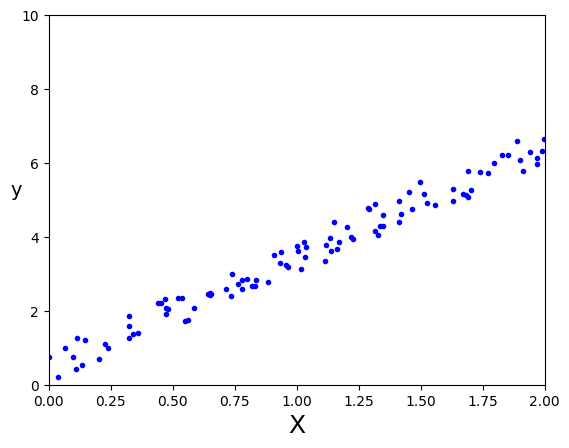

In [24]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1) #X are 100 inputs with 1-dimensional feature randomly distributed in [0, 2)
y = 3 * X + np.random.rand(100, 1) #y are true label values

plt.plot(X, y, 'b.')
plt.xlabel("X", fontsize=18)
plt.ylabel("y", fontsize=14, rotation=0)
plt.axis([0, 2, 0, 10])
plt.show()

In [25]:
from sklearn.neighbors import KNeighborsRegressor

LR_model = KNeighborsRegressor(n_neighbors=5)
LR_model.fit(X, y)

KNeighborsRegressor()

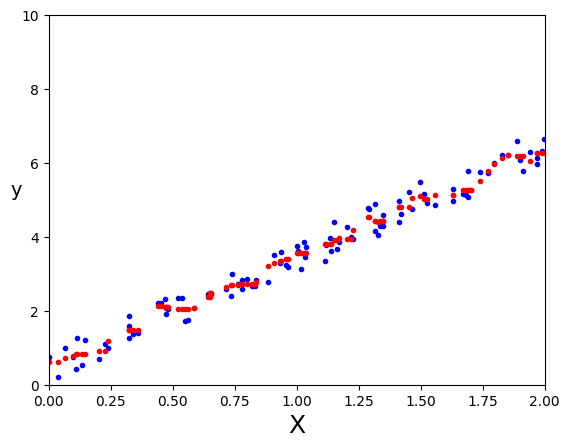

In [26]:
plt.plot(X, y, "b.")
plt.plot(X, LR_model.predict(X), "r.")
plt.xlabel("X", fontsize=18)
plt.ylabel("y", fontsize=14, rotation=0)
plt.axis([0, 2, 0, 10])
plt.show()

In [28]:
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error

#Root Mean Square Error (RMSE)
rmse = root_mean_squared_error(y, LR_model.predict(X))

#Mean Absolute Error (MAE)
mae = mean_absolute_error(y, LR_model.predict(X))

print("Root Mean Square Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

Root Mean Square Error (RMSE): 0.24101655861348112
Mean Absolute Error (MAE): 0.20180022586412988
